In [1]:
import torch 
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import os
import random
import cv2
import numpy as np

In [2]:
folder_path = '../_MSTAR/TRAIN'
all_images = []

# With subfolders
for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    for image_file in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_file)
        all_images.append(image_path)

# # Without subfolders
# for image_file in os.listdir(folder_path):
#     image_path = os.path.join(folder_path, image_file)
#     all_images.append(image_path)

In [3]:
random.shuffle(all_images)

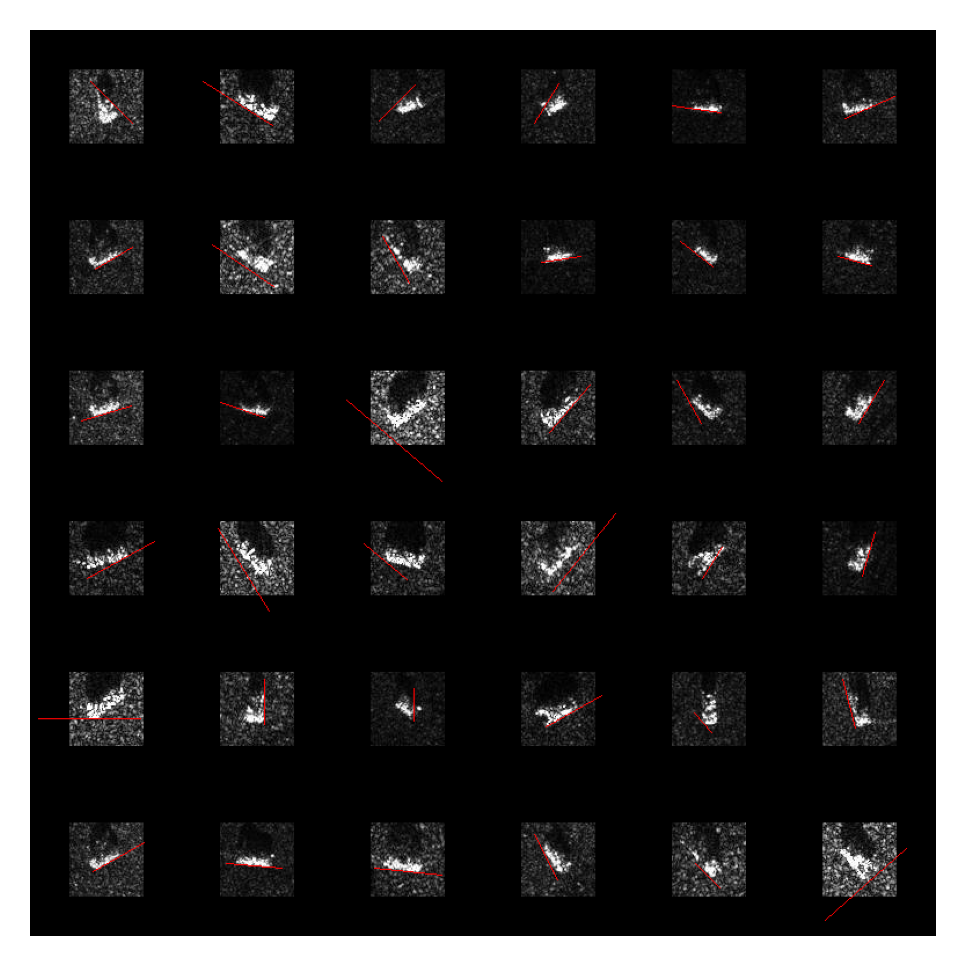

In [4]:
grid_list = []

for i in range(36):
    img = cv2.imread(all_images[i])
    img_1 = img.copy()
    
    # Get the height and width of the image
    height, width, _ = img_1.shape
    # Get the start and end indices for the rows and columns
    start_row, end_row = (height - 64) // 2, (height + 64) // 2
    start_col, end_col = (width - 64) // 2, (width + 64) // 2
    # Set the values of the pixels outside the center 64x64 to zero
    img_1[:start_row, :] = 0
    img_1[end_row:, :] = 0
    img_1[:, :start_col] = 0
    img_1[:, end_col:] = 0

    # Turn the cutted image to grayscale
    gray = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
    
    # kernel_size = 3
    # gray = cv2.medianBlur(gray, kernel_size)
    # Turn grayscale img to binary image, threshold value is important
    # # ++++++++++++++ typical value 1 = 80 ++++++++++++++ # # 
    # # ++++++++++++++ typical value 2 = 85 (2S1, BMP2, D7)++++++++++++++ # # 
    ret, binary = cv2.threshold(gray,80,255,cv2.THRESH_BINARY) 

    # Find the contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    contour = max(contours, key=cv2.contourArea)
    area, trgl = cv2.minEnclosingTriangle(contour)
    trgl = trgl.astype(int)
    
#     Draw Triangle
    # for i in range(0, 3):                               
    #     result5 = cv2.line(img_1, trgl[i][0], trgl[(i + 1) % 3][0], (255,0,0), 1)
    
#  Draw Judge Line
    index_list = [0, 1, 2]
    index = np.argmax(trgl[:, :, 1])
    index_list.remove(index)
    low_point = trgl[index]
    point_A = trgl[index_list[0]]
    point_B = trgl[index_list[1]]
    len_line_A = np.sqrt(np.sum((point_A - low_point)**2))
    len_line_B = np.sqrt(np.sum((point_B - low_point)**2))
    target_point = point_A if len_line_A > len_line_B else point_B
    result5 = cv2.line(img_1, low_point[0], target_point[0], (255,0,0), 1)
    
    img_tensor = torch.from_numpy(result5).permute(2,0,1)
    grid_list.append(img_tensor)
    
grid = make_grid(grid_list, normalize=False, nrow=6)

plt.rcParams['figure.dpi'] = 300
plt.axis('off')
plt.imshow(grid.permute(1,2,0))
plt.show()